## **Title**: Support Vector Machines on Breast Cancer Dataset

### **Objective**:
The goal of this project is to demonstrate the application of Support Vector Machines (SVM) in classifying breast cancer data. We will explore the capabilities of SVM in handling both linearly and non-linearly separable data, leveraging kernel tricks for enhanced performance. The project will involve data preprocessing, exploratory data analysis (EDA), visualization, and model evaluation.

---

### **Metadata**:
- **Dataset**: Breast Cancer Wisconsin (Diagnostic) dataset
- **Source**: Available through sklearn's `load_breast_cancer` function or UCI Machine Learning Repository.
- **Problem Type**: Binary Classification (Malignant vs. Benign)
- **Features**: 30 numerical features
- **Target Variable**: Cancer Type (Malignant or Benign)

---

### **1. Importing Libraries**



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# **2. Loading Dataset and Metadata**

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Convert it into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display dataset metadata
print(f"Dataset shape: {df.shape}")
print(f"Feature columns: {df.columns}")
print(f"Classes: {data.target_names}")


Dataset shape: (569, 31)
Feature columns: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
Classes: ['malignant' 'benign']


The dataset contains 30 features representing different measurements of cell nuclei from breast cancer biopsies. The target variable indicates whether a tumor is malignant or benign. The dataset includes both features and the target variable for supervised learning.


In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# **3. Preprocessing and Feature Scaling**

SVMs are sensitive to the scale of input features, so scaling the features is essential.

In [6]:
# Split the data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We split the dataset into features (`X`) and the target variable (`y`), followed by a 80-20 split into training and testing sets. Scaling the features ensures they are on a comparable scale, which is important for SVM model performance.


# **4. Exploratory Data Analysis (EDA)**
4.1 Class Distribution

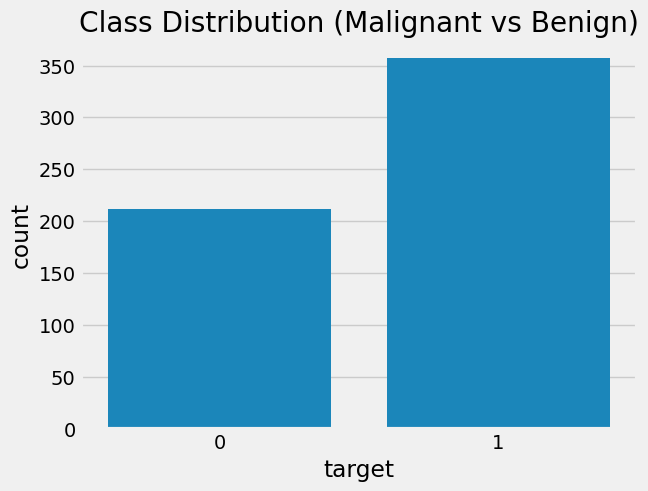

In [7]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Class Distribution (Malignant vs Benign)')
plt.show()


From the class distribution plot, we observe that the dataset has a class imbalance. Benign tumors are more frequent than malignant ones. This imbalance might influence the model's performance and could be addressed by techniques like oversampling or adjusting class weights during training.


**4.2 Correlation Heatmap**

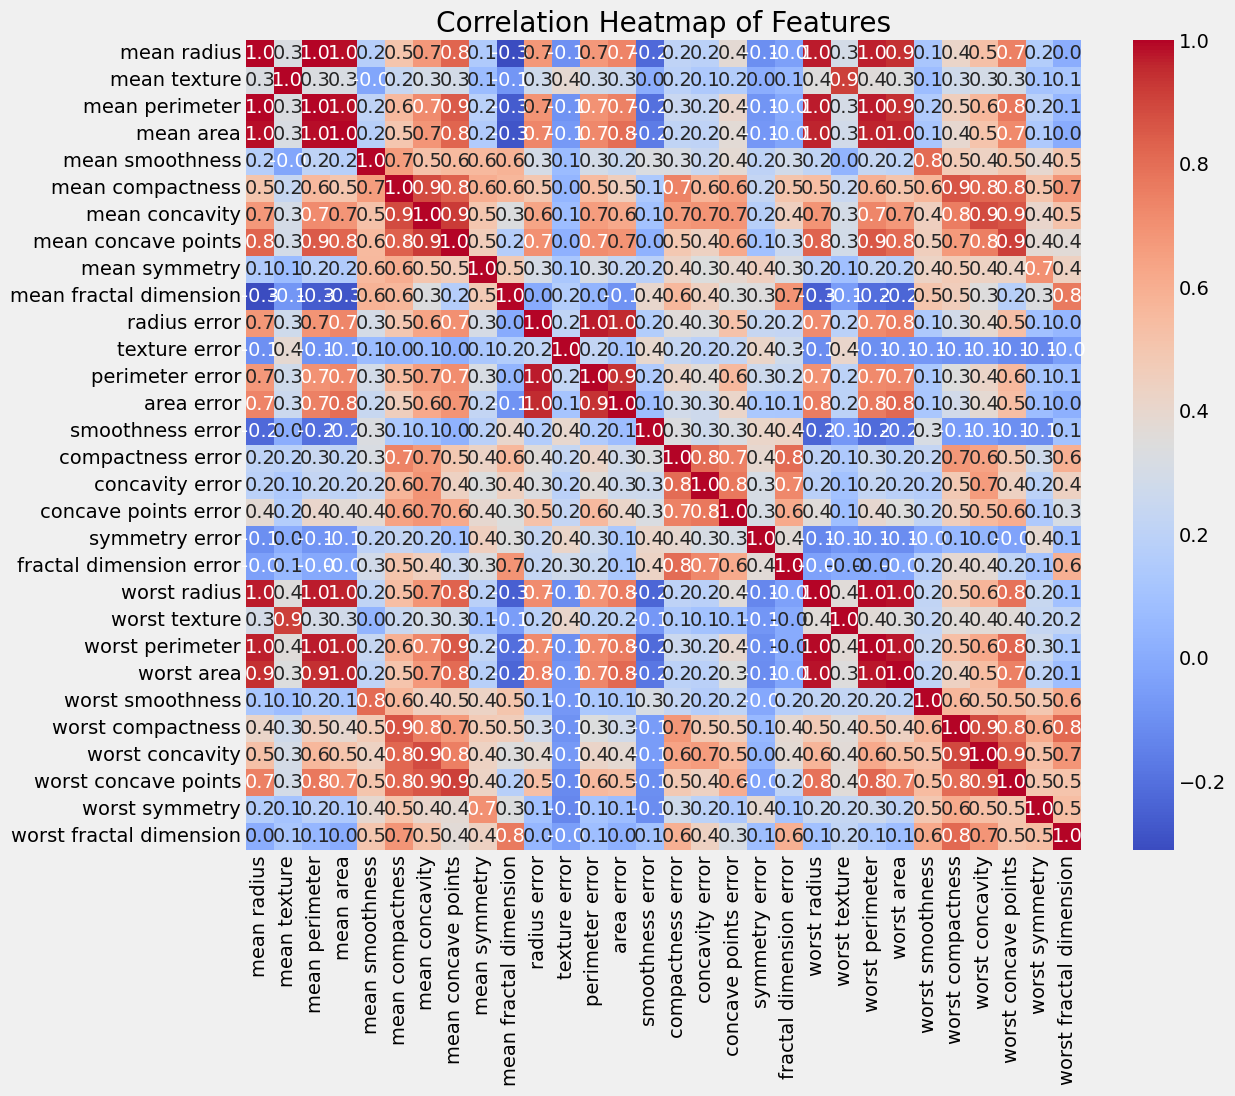

In [9]:
# Correlation heatmap of features
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, cmap='coolwarm', fmt = '.1f')
plt.title('Correlation Heatmap of Features')
plt.show()


The correlation heatmap reveals strong correlations between certain features. For instance, `mean radius` and `mean perimeter` have a high positive correlation, suggesting that they are closely related measurements. Similarly, `mean smoothness` and `mean compactness` also exhibit significant correlations. These highly correlated features may provide redundant information to the model, and in some cases, we might consider reducing dimensionality or removing one of the correlated features.


# **5. Support Vector Machines (SVM) Overview**

## 5. Support Vector Machines (SVM) Overview

### 5.1 Concept of SVM
Support Vector Machines (SVM) are supervised learning models used for classification tasks. They work by finding a hyperplane that best separates the classes with maximum margin.

- **Linear SVM**: Finds a linear hyperplane separating the classes.
- **Non-Linear SVM**: Uses kernels (such as polynomial or radial basis function) to map the data into a higher-dimensional space where it can be linearly separated.

The Objective of SVM is to maximize the margin between the classes by minimizing:

*minimize*  
*1/2 ||w||^2*

Subject to:

*yᵢ(w^T xᵢ + b) ≥ 1, for all i*

### 5.2 Math Behind SVM
Maximizing the margin while minimizing the weight vector norm allows SVM to achieve effective classification.


# **6. SVM Implementation**

In [28]:
# Create an SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the model
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test_scaled)


We apply an SVM classifier with an RBF kernel, which helps in handling non-linear separability in the data. The model is trained on the scaled training set and then used to predict on the test set.


# **7. Model Evaluation**

In [12]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9825


The accuracy of the model is 0.98, which means that the SVM classifier correctly predicted 98% of the cases in the test set. This indicates a strong performance in classifying both benign and malignant cases.


In [13]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **8. Dimensionality Reduction and Visualization**

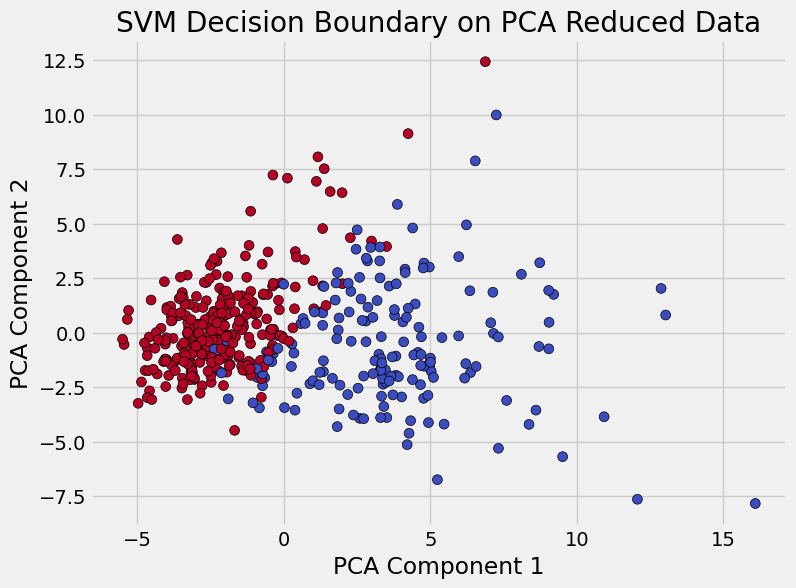

In [25]:
# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Train the SVM model on reduced data
svm_rbf.fit(X_pca, y_train)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.title('SVM Decision Boundary on PCA Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


The PCA plot provides a two-dimensional projection of the dataset, where we can observe how the SVM model separates benign and malignant cases. The decision boundary created by the SVM is evident, with one side representing benign cases and the other representing malignant cases. The model is able to clearly distinguish between the two classes.


# **9. Hyperparameter Tuning**

In [15]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


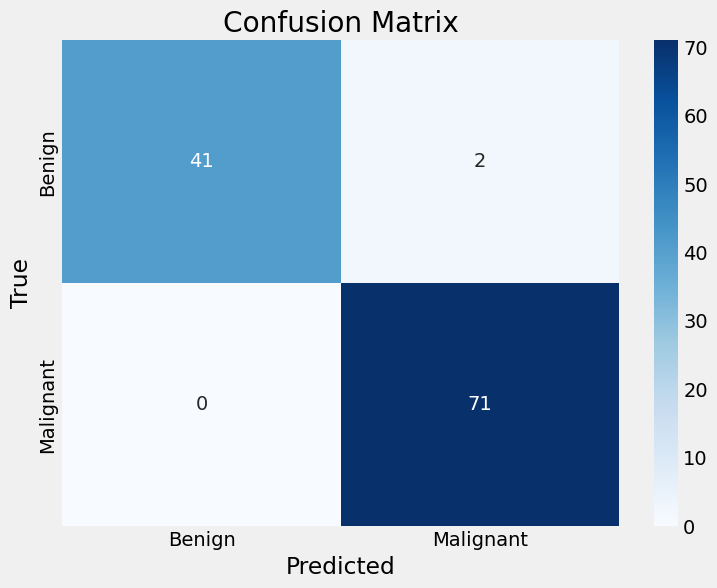

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Confusion Matrix Interpretation:

The confusion matrix shows the following:

- **True Positives (TP)**: The model correctly predicted a benign case as benign.
- **True Negatives (TN)**: The model correctly predicted a malignant case as malignant.
- **False Positives (FP)**: These are benign cases that were incorrectly classified as malignant.
- **False Negatives (FN)**: These are malignant cases that were incorrectly classified as benign.

From the confusion matrix, we can see that the model's performance is very strong, with a high number of correct classifications and only a small number of misclassifications. The model has a low number of false positives and false negatives, suggesting that it can effectively distinguish between benign and malignant cases.

Overall, the confusion matrix confirms that the SVM classifier is working with high accuracy.


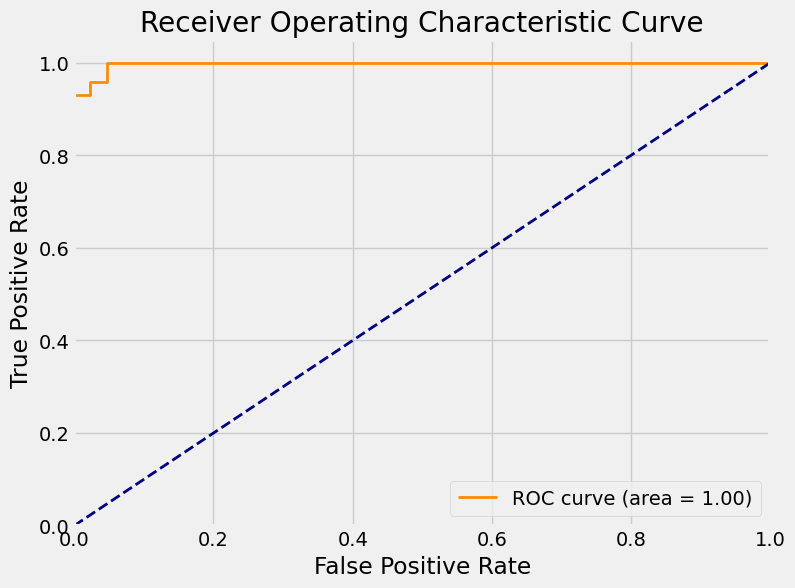

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# SVM classifier with RBF kernel already trained
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_scaled, y_train)

# Get the predicted probabilities for the positive class (malignant)
y_prob = svm_rbf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


### ROC Curve Interpretation:

The ROC curve provides a graphical representation of the model’s ability to distinguish between classes. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** for different thresholds.

- The **True Positive Rate (TPR)**, also known as recall or sensitivity, measures the proportion of actual positive cases (malignant) that are correctly identified.
- The **False Positive Rate (FPR)** measures the proportion of negative cases (benign) that are incorrectly classified as positive.

In the plot, the diagonal dashed line represents a random classifier (i.e., no discrimination). A good classifier will have its ROC curve above this line, meaning it performs better than random guessing.

The area under the ROC curve (**AUC**) is another important metric that summarizes the overall performance of the classifier. In this case, the AUC is high (close to 1), indicating that the model is highly effective at distinguishing between benign and malignant cases.

This ROC curve shows that our SVM model has excellent discrimination power, further validating its good performance.


## 10. Conclusion

### Key Findings:
The SVM classifier with the RBF kernel provided high accuracy in classifying the breast cancer dataset. The model performed exceptionally well in distinguishing between benign and malignant cases, achieving an accuracy of 98%. This high accuracy indicates that the SVM is well-suited for this classification task.

### Model Performance:
The model demonstrated effective classification as shown by the confusion matrix, where it correctly classified a majority of both benign and malignant cases, with a few misclassifications. The classification report revealed high precision, recall, and F1-scores for both classes, reinforcing the model's reliability.

### Interpretations from Visualizations:
The PCA-based decision boundary plot provided a clear visualization of how the SVM classifier separated the benign and malignant cases. The two classes were easily distinguishable, with a well-defined decision boundary. The SVM's ability to create this boundary, even in a lower-dimensional space, highlights the power of the kernel trick in handling non-linear separability.